In [1]:
#!pip install networkx

In [53]:
import networkx as nx
from collections import defaultdict
from typing import List, Tuple, Set

In [32]:
"""Need to be able to do the reverse as well -- go from a dict of general ledger codes to a graph representation"""

'Need to be able to do the reverse as well -- go from a dict of general ledger codes to a graph representation'

In [71]:
class Inventory:
    def __init__(self, nodes: Set[str], edges: Set[Tuple[str,str]]):
        
        self.validate_edges(edges)
        self.graph = nx.DiGraph()
        self.graph.add_nodes_from(nodes)
        self.graph.add_edges_from(edges)

    def validate_edges(self, edges: Set[Tuple[str,str]]):
        """
        Check that each child has only one parent
        
        TODO use typechecking to enforce that each tuple is a pair of strings
        """
        #Each child has only one parent implies that no node appears more than once as the second element in an edge
        children = [edge[1] for edge in edges]
        if len(children) != len(set(children)):
            print(children)
            raise Exception("Some nodes have more than one parent!")
        
        
    def get_parent(self, node: str):
        if not node in self.graph.nodes:
            raise Exception(f"{node} not in nodes: {list(G.nodes)}")
        for edge in self.graph.edges:
            if edge[1] == node:
                return edge[0]
                
    def get_ancestors(self,node, ancestors=None):
        """Get the ancestors of a node recursively.
        we use the convention that every node is an ancestor of itself"""
        
        ancestors = ancestors or [node]
        parent = self.get_parent(node)
        if not parent:
            return ancestors
        else:
            ancestors.append(parent)
            anc = self.get_ancestors(parent, ancestors)
            return anc
        
        
    
        

In [72]:
inv = Inventory(nodes=set(['seafood', 'meat', 'fish', 'mussels', 'steak', 'chicken', "snapper", "chicken", "drumstick", "quarter", "filet mignon", "12oz", "10oz", "8oz"]),
               edges =set([('seafood', 'fish'), ('seafood', 'mussels'), ('meat', 'steak'), ('meat', 'chicken'), ('fish', 'snapper'), ('steak', 'filet mignon'), ('chicken', 'quarter'), ('chicken', 'drumstick'), ('filet mignon', '8oz'), ('filet mignon', '10oz'), ('filet mignon', '12oz')]))

In [69]:
inv.get_parent("steak")

'meat'

In [73]:
inv.get_ancestors("12oz")

['12oz', 'filet mignon', 'steak', 'meat']

In [3]:
def get_parent(G, node):
    """TODO Need to assert that each child has only one parent"""
    if not node in G.nodes:
        raise Exception(f"{node} not in nodes: {list(G.nodes)}")
    for edge in G.edges:
        if edge[1] == node:
            return edge[0]


In [4]:
def get_ancestors(G,node, ancestors=None):
    """Get the ancestors of a node recursively.
    we use the convention that every node is an ancestor of itself"""
    
    ancestors = ancestors or [node]
    parent = get_parent(G,node)
    if not parent:
        return ancestors
    else:
        ancestors.append(parent)
        anc = get_ancestors(G,parent, ancestors)
        return anc
        
        
    

In [5]:
def get_level(G,node):
    """Get the number of ancestors (including self)"""
    return len(get_ancestors(G,node))

In [34]:
def get_max_level(G):
    #TODO
    pass

In [6]:
def get_code(G,node):
    """FIXME don't hardcode 4 levels"""
    index = nx.get_node_attributes(G,"index")[node]
    multiplier = 10**(4-get_level(G,node))
    parent = get_parent(G,node)
    if get_level(G,node) == 1:
        return index*multiplier
    else:
        return index*multiplier + get_code(G,parent)

In [7]:
G = nx.DiGraph()
for key in ['seafood', 'meat', 'fish', 'mussels', 'steak', 'chicken', "snapper", "chicken", "drumstick", "quarter", "filet mignon", "12oz", "10oz", "8oz"]:
    G.add_node(key)
list(G.nodes)

['seafood',
 'meat',
 'fish',
 'mussels',
 'steak',
 'chicken',
 'snapper',
 'drumstick',
 'quarter',
 'filet mignon',
 '12oz',
 '10oz',
 '8oz']

In [8]:
G.add_edge("meat","steak")
G.add_edge("steak","filet mignon")
G.add_edge("filet mignon","8oz")
G.add_edge("filet mignon","10oz")
G.add_edge("filet mignon","12oz")
G.add_edge("seafood","fish")
G.add_edge("fish", "snapper")
G.add_edge("seafood","mussels")
G.add_edge("meat","chicken")
G.add_edge("chicken","quarter")
G.add_edge("chicken","drumstick")
G.add_edge("meat","steak")

In [35]:
F = nx.DiGraph()
F.add_nodes_from(['seafood',
 'meat',
 'fish',
 'mussels',
 'steak',
 'chicken',
 'snapper',
 'drumstick',
 'quarter',
 'filet mignon',
 '12oz',
 '10oz',
 '8oz'])

In [37]:
F.nodes

NodeView(('seafood', 'meat', 'fish', 'mussels', 'steak', 'chicken', 'snapper', 'drumstick', 'quarter', 'filet mignon', '12oz', '10oz', '8oz'))

In [39]:
F.add_edges_from([('seafood', 'fish'), ('seafood', 'mussels'), ('meat', 'steak'), ('meat', 'chicken'), ('fish', 'snapper'), ('steak', 'filet mignon'), ('chicken', 'quarter'), ('chicken', 'drumstick'), ('filet mignon', '8oz'), ('filet mignon', '10oz'), ('filet mignon', '12oz')])

In [41]:
F.edges

OutEdgeView([('seafood', 'fish'), ('seafood', 'mussels'), ('meat', 'steak'), ('meat', 'chicken'), ('fish', 'snapper'), ('steak', 'filet mignon'), ('chicken', 'quarter'), ('chicken', 'drumstick'), ('filet mignon', '8oz'), ('filet mignon', '10oz'), ('filet mignon', '12oz')])

In [38]:
G.nodes

NodeView(('seafood', 'meat', 'fish', 'mussels', 'steak', 'chicken', 'snapper', 'drumstick', 'quarter', 'filet mignon', '12oz', '10oz', '8oz'))

In [9]:
G.edges

OutEdgeView([('seafood', 'fish'), ('seafood', 'mussels'), ('meat', 'steak'), ('meat', 'chicken'), ('fish', 'snapper'), ('steak', 'filet mignon'), ('chicken', 'quarter'), ('chicken', 'drumstick'), ('filet mignon', '8oz'), ('filet mignon', '10oz'), ('filet mignon', '12oz')])

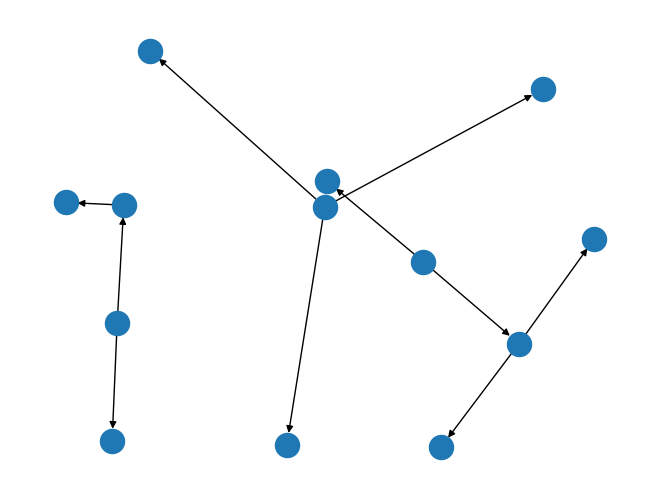

In [10]:
nx.draw(G)

In [11]:
nx.to_dict_of_dicts(G)

{'seafood': {'fish': {}, 'mussels': {}},
 'meat': {'steak': {}, 'chicken': {}},
 'fish': {'snapper': {}},
 'mussels': {},
 'steak': {'filet mignon': {}},
 'chicken': {'quarter': {}, 'drumstick': {}},
 'snapper': {},
 'drumstick': {},
 'quarter': {},
 'filet mignon': {'8oz': {}, '10oz': {}, '12oz': {}},
 '12oz': {},
 '10oz': {},
 '8oz': {}}

In [12]:
get_parent(G, "snapper")

'fish'

In [13]:
get_parent(G, "fish")

'seafood'

In [14]:
get_parent(G, "12oz")

'filet mignon'

In [15]:
get_level(G, "12oz")

4

In [16]:
get_level(G, "meat")

1

In [17]:
get_ancestors(G,"12oz")

['12oz', 'filet mignon', 'steak', 'meat']

In [18]:
get_ancestors(G,"snapper")

['snapper', 'fish', 'seafood']

In [19]:
get_ancestors(G,"quarter")

['quarter', 'chicken', 'meat']

In [22]:
#want to loop over nodes of the same "level" and index them
levels = defaultdict(list)
for node in G.nodes:
    lvl = get_level(G,node)
    levels[lvl].append(node)
    
    

In [23]:
levels

defaultdict(list,
            {1: ['seafood', 'meat'],
             2: ['fish', 'mussels', 'steak', 'chicken'],
             3: ['snapper', 'drumstick', 'quarter', 'filet mignon'],
             4: ['12oz', '10oz', '8oz']})

In [24]:
attributes = dict()

for lv, nodes in levels.items():
    for i,node in enumerate(nodes):
        attributes[node] = i+1



In [25]:
attributes

{'seafood': 1,
 'meat': 2,
 'fish': 1,
 'mussels': 2,
 'steak': 3,
 'chicken': 4,
 'snapper': 1,
 'drumstick': 2,
 'quarter': 3,
 'filet mignon': 4,
 '12oz': 1,
 '10oz': 2,
 '8oz': 3}

In [26]:
nx.set_node_attributes(G,attributes, "index")

In [27]:
nx.get_node_attributes(G, "index")

{'seafood': 1,
 'meat': 2,
 'fish': 1,
 'mussels': 2,
 'steak': 3,
 'chicken': 4,
 'snapper': 1,
 'drumstick': 2,
 'quarter': 3,
 'filet mignon': 4,
 '12oz': 1,
 '10oz': 2,
 '8oz': 3}

In [29]:
get_code(G,"meat")

2000

In [30]:
get_code(G,"seafood")

1000

In [31]:
get_code(G,"chicken")

2400

In [28]:
get_code(G,"12oz")

2341